In [3]:
!nvidia-smi

Sun Jun  8 08:22:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   45C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
!pip install roboflow
from roboflow import Roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 129.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [7]:
rf = Roboflow(api_key="PKpcGmbYZkw68ZTHLcoa")
project = rf.workspace("cc25cf145").project("sapujagat")
version = project.version(2)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to SapuJagat-2 in yolov8:: 100%|██████████| 3052/3052 [00:00<00:00, 6669.06it/s]


In [8]:
!pip install ultralytics --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 97.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 63.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 105.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [9]:
from ultralytics import YOLO
import torch

print("PyTorch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
PyTorch version: 2.6.0+cu124
CUDA available: True


In [10]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 353MB/s]


In [12]:
model.train(
    data='/content/SapuJagat-2/data.yaml',
    epochs=100,
    imgsz=640,
    batch=16,
    name='custom-yolov8',
    pretrained=True,
    degrees=10,          # rotasi
    translate=0.1,       # translasi
    scale=0.5,           # skala
    shear=2.0,           # shear
    perspective=0.001,   # perspektif
    flipud=0.5,          # flip vertikal
    fliplr=0.5,          # flip horizontal
    hsv_h=0.015,         # perubahan hue
    hsv_s=0.7,           # saturasi
    hsv_v=0.4,           # kecerahan
    mosaic=1.0,          # aktifkan mosaic
    mixup=0.2,           # aktifkan mixup (opsional)
    copy_paste=0.1,      # copy paste augmentation
    erasing=0.4,         # random erasing
    crop_fraction=1.0    # cropping (1.0 artinya tidak dicrop)
)

WARNING ⚠️ 'crop_fraction' is deprecated and will be removed in in the future.
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.1, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/SapuJagat-2/data.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.2, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=custom-yolov82, nbs=64, nms=False, opset=None, optimize=False, optimizer

100%|██████████| 755k/755k [00:00<00:00, 159MB/s]

Overriding model.yaml nc=80 with nc=10

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

Model summary: 129 layers, 3,012,798 parameters, 3,012,782 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 384MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 93.3±156.2 MB/s, size: 45.2 KB)


train: Scanning /content/SapuJagat-2/train/labels... 1064 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1064/1064 [00:01<00:00, 743.04it/s] 

train: New cache created: /content/SapuJagat-2/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 299, len(boxes) = 1574. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 33.9±43.0 MB/s, size: 44.1 KB)


val: Scanning /content/SapuJagat-2/valid/labels... 228 images, 0 backgrounds, 0 corrupt: 100%|██████████| 228/228 [00:00<00:00, 544.31it/s]

val: New cache created: /content/SapuJagat-2/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 51, len(boxes) = 293. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/custom-yolov82/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/custom-yolov82
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.06G      1.606      3.736      1.961         42        640: 100%|██████████| 67/67 [00:25<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.41it/s]


                   all        228        293    0.00482      0.944      0.122     0.0672

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.54G      1.515      3.159      1.893         41        640: 100%|██████████| 67/67 [00:23<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.37it/s]

                   all        228        293      0.325      0.375      0.213      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.56G      1.541      2.915      1.938         22        640: 100%|██████████| 67/67 [00:22<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.09it/s]

                   all        228        293       0.22      0.374      0.209     0.0931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.58G      1.554      2.864      1.931         32        640: 100%|██████████| 67/67 [00:22<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        228        293      0.262      0.368      0.259      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.59G      1.524      2.699      1.904         48        640: 100%|██████████| 67/67 [00:21<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.44it/s]

                   all        228        293      0.337      0.406      0.338      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.61G      1.527      2.711      1.908         62        640: 100%|██████████| 67/67 [00:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        228        293      0.313      0.429      0.313      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.63G      1.499      2.582      1.854         36        640: 100%|██████████| 67/67 [00:22<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        228        293      0.325      0.446      0.377      0.166



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.65G      1.474      2.537      1.838         25        640: 100%|██████████| 67/67 [00:22<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.00it/s]

                   all        228        293      0.557      0.474      0.503      0.252



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.66G      1.456      2.451      1.832         30        640: 100%|██████████| 67/67 [00:21<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.55it/s]

                   all        228        293      0.516      0.456      0.457       0.23



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.68G      1.491      2.428      1.851         38        640: 100%|██████████| 67/67 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.58it/s]


                   all        228        293      0.459      0.475      0.458      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       2.7G      1.469      2.384      1.832         24        640: 100%|██████████| 67/67 [00:21<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.87it/s]


                   all        228        293      0.577      0.575      0.601      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.71G      1.457      2.393      1.811         29        640: 100%|██████████| 67/67 [00:21<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        228        293      0.559      0.579      0.574       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.73G      1.425      2.237      1.805         50        640: 100%|██████████| 67/67 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        228        293      0.599      0.563      0.618      0.344



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.75G      1.423      2.229      1.787         29        640: 100%|██████████| 67/67 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.46it/s]

                   all        228        293      0.589      0.526      0.552      0.313



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.76G      1.392      2.193       1.77         39        640: 100%|██████████| 67/67 [00:22<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all        228        293      0.712      0.597      0.677      0.338



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.78G      1.417      2.169      1.783         34        640: 100%|██████████| 67/67 [00:22<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        228        293      0.662      0.569      0.652      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       2.8G      1.395      2.146      1.777         45        640: 100%|██████████| 67/67 [00:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.25it/s]

                   all        228        293      0.637      0.541      0.562      0.306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.82G      1.423      2.123       1.81         56        640: 100%|██████████| 67/67 [00:22<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        228        293      0.678       0.56      0.594       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.83G        1.4      2.088      1.781         24        640: 100%|██████████| 67/67 [00:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all        228        293      0.673      0.536      0.621      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.85G      1.369      2.096      1.767         35        640: 100%|██████████| 67/67 [00:21<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.96it/s]

                   all        228        293      0.715      0.568      0.659      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.86G      1.381      2.111      1.774         35        640: 100%|██████████| 67/67 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.25it/s]

                   all        228        293       0.64      0.518      0.648      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.88G      1.405      2.054      1.786         48        640: 100%|██████████| 67/67 [00:21<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.66it/s]


                   all        228        293      0.719      0.601      0.694      0.409

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100       2.9G      1.386      1.998      1.769         45        640: 100%|██████████| 67/67 [00:20<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.54it/s]

                   all        228        293      0.744      0.587      0.685      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.92G      1.372      2.031      1.757         31        640: 100%|██████████| 67/67 [00:22<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all        228        293      0.687      0.611       0.68        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.93G      1.363      1.971      1.741         41        640: 100%|██████████| 67/67 [00:22<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all        228        293      0.584      0.567      0.622      0.348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.95G      1.379      1.983      1.759         32        640: 100%|██████████| 67/67 [00:24<00:00,  2.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        228        293      0.747       0.54      0.671      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.97G      1.402      1.975      1.765         39        640: 100%|██████████| 67/67 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all        228        293       0.72      0.568      0.668      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.99G      1.319      1.878      1.717         37        640: 100%|██████████| 67/67 [00:22<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        228        293      0.775      0.648      0.736      0.455



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         3G      1.359      1.905      1.735         48        640: 100%|██████████| 67/67 [00:22<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        228        293      0.715      0.594      0.716      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.02G      1.344      1.837       1.72         68        640: 100%|██████████| 67/67 [00:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        228        293      0.711      0.665       0.74      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.04G      1.357      1.859      1.731         43        640: 100%|██████████| 67/67 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        228        293      0.613      0.592       0.66      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.05G       1.33      1.842      1.711         35        640: 100%|██████████| 67/67 [00:22<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        228        293      0.754      0.632      0.728      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.07G      1.342      1.827       1.71         32        640: 100%|██████████| 67/67 [00:23<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.60it/s]

                   all        228        293       0.69      0.658      0.715      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.09G      1.323      1.816      1.693         25        640: 100%|██████████| 67/67 [00:25<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.18it/s]

                   all        228        293      0.786       0.64      0.735      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.11G      1.349      1.803      1.709         43        640: 100%|██████████| 67/67 [00:23<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        228        293      0.717       0.69       0.73      0.432



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.12G      1.331      1.783      1.713         31        640: 100%|██████████| 67/67 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.66it/s]

                   all        228        293       0.74      0.694      0.757      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.14G      1.328       1.78      1.705         28        640: 100%|██████████| 67/67 [00:24<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        228        293      0.691      0.646      0.692       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.16G      1.326      1.805      1.719         35        640: 100%|██████████| 67/67 [00:23<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        228        293      0.757      0.668      0.764      0.458



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.17G      1.335      1.741        1.7         30        640: 100%|██████████| 67/67 [00:23<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        228        293        0.7      0.699      0.765      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.19G      1.314      1.765      1.701         35        640: 100%|██████████| 67/67 [00:23<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        228        293      0.731       0.71      0.765      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.21G      1.287      1.668      1.683         31        640: 100%|██████████| 67/67 [00:23<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.61it/s]

                   all        228        293      0.749       0.62      0.731      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.22G      1.316      1.761      1.704         25        640: 100%|██████████| 67/67 [00:23<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.53it/s]

                   all        228        293       0.77      0.652      0.746      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.24G      1.296      1.719      1.663         24        640: 100%|██████████| 67/67 [00:23<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        228        293      0.745      0.673      0.739      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.26G      1.288       1.65      1.669         38        640: 100%|██████████| 67/67 [00:23<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.11it/s]

                   all        228        293      0.715      0.702      0.746      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.27G      1.295      1.699      1.686         29        640: 100%|██████████| 67/67 [00:23<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.36it/s]

                   all        228        293      0.755      0.681      0.734      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.29G      1.273      1.655      1.657         39        640: 100%|██████████| 67/67 [00:23<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        228        293       0.77      0.682      0.758      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.31G       1.29       1.67      1.669         27        640: 100%|██████████| 67/67 [00:23<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        228        293      0.761       0.67      0.751      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.33G      1.306      1.653      1.685         24        640: 100%|██████████| 67/67 [00:23<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        228        293      0.693      0.751      0.765      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.34G      1.262      1.617      1.656         28        640: 100%|██████████| 67/67 [00:24<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        228        293      0.765      0.692      0.759      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.36G      1.285      1.626      1.659         24        640: 100%|██████████| 67/67 [00:23<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.35it/s]

                   all        228        293      0.771      0.688      0.751      0.462



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.38G       1.27      1.632      1.659         36        640: 100%|██████████| 67/67 [00:23<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.21it/s]

                   all        228        293        0.8      0.668      0.751      0.464



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.39G      1.284       1.63      1.658         36        640: 100%|██████████| 67/67 [00:23<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.31it/s]

                   all        228        293      0.814      0.663      0.766      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.41G       1.28       1.58      1.652         24        640: 100%|██████████| 67/67 [00:23<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.42it/s]

                   all        228        293      0.721      0.678       0.74       0.48



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.43G       1.27      1.583      1.645         36        640: 100%|██████████| 67/67 [00:23<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.29it/s]

                   all        228        293      0.727      0.738      0.772      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.45G      1.248      1.552      1.633         32        640: 100%|██████████| 67/67 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.45it/s]

                   all        228        293      0.797      0.655      0.764      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.46G      1.277      1.589      1.657         28        640: 100%|██████████| 67/67 [00:23<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.56it/s]

                   all        228        293      0.767      0.698      0.776       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.48G       1.27      1.588      1.658         43        640: 100%|██████████| 67/67 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.34it/s]

                   all        228        293      0.767      0.707      0.784      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       3.5G      1.255      1.587      1.637         35        640: 100%|██████████| 67/67 [00:22<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.48it/s]

                   all        228        293      0.738      0.698      0.772      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.52G      1.236      1.535      1.629         33        640: 100%|██████████| 67/67 [00:23<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.17it/s]

                   all        228        293      0.804      0.637      0.767      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.54G      1.245      1.537      1.633         33        640: 100%|██████████| 67/67 [00:23<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.76it/s]

                   all        228        293      0.798      0.718      0.792      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.54G      1.234      1.509      1.626         30        640: 100%|██████████| 67/67 [00:23<00:00,  2.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.41it/s]

                   all        228        293      0.813      0.714      0.806      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.57G      1.248      1.547      1.631         26        640: 100%|██████████| 67/67 [00:23<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.59it/s]

                   all        228        293      0.801      0.711      0.786      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.58G      1.227       1.54      1.625         21        640: 100%|██████████| 67/67 [00:23<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.32it/s]

                   all        228        293      0.779      0.724      0.799      0.484



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100       3.6G      1.241      1.512      1.636         30        640: 100%|██████████| 67/67 [00:22<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.63it/s]

                   all        228        293      0.783       0.71      0.786      0.476



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.61G      1.224       1.48       1.61         25        640: 100%|██████████| 67/67 [00:21<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.48it/s]

                   all        228        293      0.754      0.684      0.759      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.64G      1.212      1.527      1.613         30        640: 100%|██████████| 67/67 [00:21<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.61it/s]

                   all        228        293      0.815      0.701      0.808      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.65G      1.225      1.461      1.608         22        640: 100%|██████████| 67/67 [00:21<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.24it/s]

                   all        228        293      0.791      0.688      0.786      0.493



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.67G      1.214      1.448      1.609         38        640: 100%|██████████| 67/67 [00:21<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.40it/s]

                   all        228        293      0.812      0.677      0.772      0.505



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.68G      1.203      1.433      1.611         27        640: 100%|██████████| 67/67 [00:23<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.49it/s]

                   all        228        293      0.802      0.688      0.791      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       3.7G      1.234      1.447      1.626         21        640: 100%|██████████| 67/67 [00:22<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.30it/s]

                   all        228        293      0.828       0.73      0.807      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.72G      1.204      1.452      1.602         25        640: 100%|██████████| 67/67 [00:22<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.27it/s]

                   all        228        293      0.805      0.735      0.804      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.74G      1.211       1.43      1.603         32        640: 100%|██████████| 67/67 [00:22<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        228        293      0.809      0.718      0.782      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.75G      1.214      1.426      1.602         42        640: 100%|██████████| 67/67 [00:22<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.30it/s]

                   all        228        293      0.795       0.73      0.791      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.77G      1.193      1.406      1.576         35        640: 100%|██████████| 67/67 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.38it/s]

                   all        228        293      0.751      0.741      0.796      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.79G      1.236      1.475      1.628         24        640: 100%|██████████| 67/67 [00:22<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]

                   all        228        293      0.783      0.719      0.784      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.81G      1.181      1.379      1.583         38        640: 100%|██████████| 67/67 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.44it/s]

                   all        228        293      0.773      0.752      0.793      0.529



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.82G      1.196      1.404      1.599         32        640: 100%|██████████| 67/67 [00:21<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all        228        293       0.76      0.748        0.8       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.84G      1.176      1.413      1.578         61        640: 100%|██████████| 67/67 [00:21<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all        228        293      0.797      0.689      0.782      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.86G      1.203      1.445      1.584         49        640: 100%|██████████| 67/67 [00:23<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.47it/s]

                   all        228        293      0.805      0.697      0.789      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.88G      1.192      1.358      1.579         32        640: 100%|██████████| 67/67 [00:22<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.67it/s]

                   all        228        293      0.826      0.702      0.796      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.89G      1.186      1.404      1.588         36        640: 100%|██████████| 67/67 [00:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.74it/s]

                   all        228        293      0.785       0.72      0.786      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.91G      1.229      1.423       1.61         27        640: 100%|██████████| 67/67 [00:22<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.65it/s]

                   all        228        293      0.784      0.708       0.78      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.93G      1.178      1.372      1.566         33        640: 100%|██████████| 67/67 [00:22<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.39it/s]

                   all        228        293      0.809      0.721      0.799      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.94G      1.157      1.315       1.55         52        640: 100%|██████████| 67/67 [00:22<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.73it/s]

                   all        228        293      0.807      0.724      0.793      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.96G       1.16      1.357      1.561         28        640: 100%|██████████| 67/67 [00:22<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.95it/s]

                   all        228        293      0.778      0.709       0.79       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.98G      1.192      1.372      1.577         35        640: 100%|██████████| 67/67 [00:21<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.43it/s]

                   all        228        293      0.758      0.714      0.783      0.509



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.99G      1.175      1.332       1.57         54        640: 100%|██████████| 67/67 [00:21<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.52it/s]

                   all        228        293      0.781      0.736      0.803      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.01G      1.171      1.382      1.576         46        640: 100%|██████████| 67/67 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.97it/s]

                   all        228        293      0.769      0.731      0.798      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.02G      1.191      1.384      1.574         25        640: 100%|██████████| 67/67 [00:22<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        228        293      0.798      0.723      0.795      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.05G      1.163      1.347      1.561         49        640: 100%|██████████| 67/67 [00:22<00:00,  2.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.57it/s]

                   all        228        293      0.745       0.74      0.784      0.527


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.06G     0.9876      1.143      1.559          9        640: 100%|██████████| 67/67 [00:21<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.75it/s]

                   all        228        293      0.793      0.719       0.79      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.08G     0.9368     0.9587      1.535         11        640: 100%|██████████| 67/67 [00:19<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.68it/s]

                   all        228        293      0.859      0.694      0.801      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.09G     0.9433     0.9032       1.53          9        640: 100%|██████████| 67/67 [00:18<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.55it/s]

                   all        228        293      0.822      0.707      0.788      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.11G     0.9402     0.8761      1.513          8        640: 100%|██████████| 67/67 [00:19<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.72it/s]

                   all        228        293      0.805      0.699      0.792      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.13G     0.9005      0.856       1.49         10        640: 100%|██████████| 67/67 [00:18<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.74it/s]

                   all        228        293      0.823      0.707      0.801      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.15G     0.9173      0.849      1.503          8        640: 100%|██████████| 67/67 [00:18<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.50it/s]

                   all        228        293      0.847        0.7      0.802      0.536



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.16G     0.9218     0.8452      1.505         18        640: 100%|██████████| 67/67 [00:19<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.71it/s]

                   all        228        293      0.809      0.728      0.796      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.18G     0.9149     0.8326      1.494         15        640: 100%|██████████| 67/67 [00:18<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  2.67it/s]

                   all        228        293      0.811      0.739        0.8      0.534



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       4.2G     0.9146     0.8625      1.499          8        640: 100%|██████████| 67/67 [00:18<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.88it/s]

                   all        228        293      0.806      0.747      0.801      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.21G     0.8904      0.808      1.466         11        640: 100%|██████████| 67/67 [00:19<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:02<00:00,  3.90it/s]

                   all        228        293      0.811      0.734        0.8      0.535



100 epochs completed in 0.704 hours.
Optimizer stripped from runs/detect/custom-yolov82/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/custom-yolov82/weights/best.pt, 6.3MB

Validating runs/detect/custom-yolov82/weights/best.pt...
Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00:00,  2.11it/s]


                   all        228        293       0.86      0.694      0.801      0.538
                  Daun         23         32       0.82      0.428      0.638      0.396
                  Kaca         19         19      0.892      0.842      0.888      0.688
                 Karet         21         24      0.797      0.458      0.647       0.35
                  Kayu         21         26      0.946      0.676      0.864      0.546
                Kertas         24         25      0.951       0.84       0.94      0.705
                 Logam         23         28      0.753      0.679      0.788      0.541
               Plastik         24         59      0.768      0.678      0.744       0.55
             Styrofoam         22         25      0.838        0.6      0.653      0.463
               Tekstil         29         29      0.948      0.966      0.985      0.686
           sisaMakanan         25         26      0.884      0.769      0.865      0.451
Speed: 0.2ms preproce

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d5842845f10>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.0

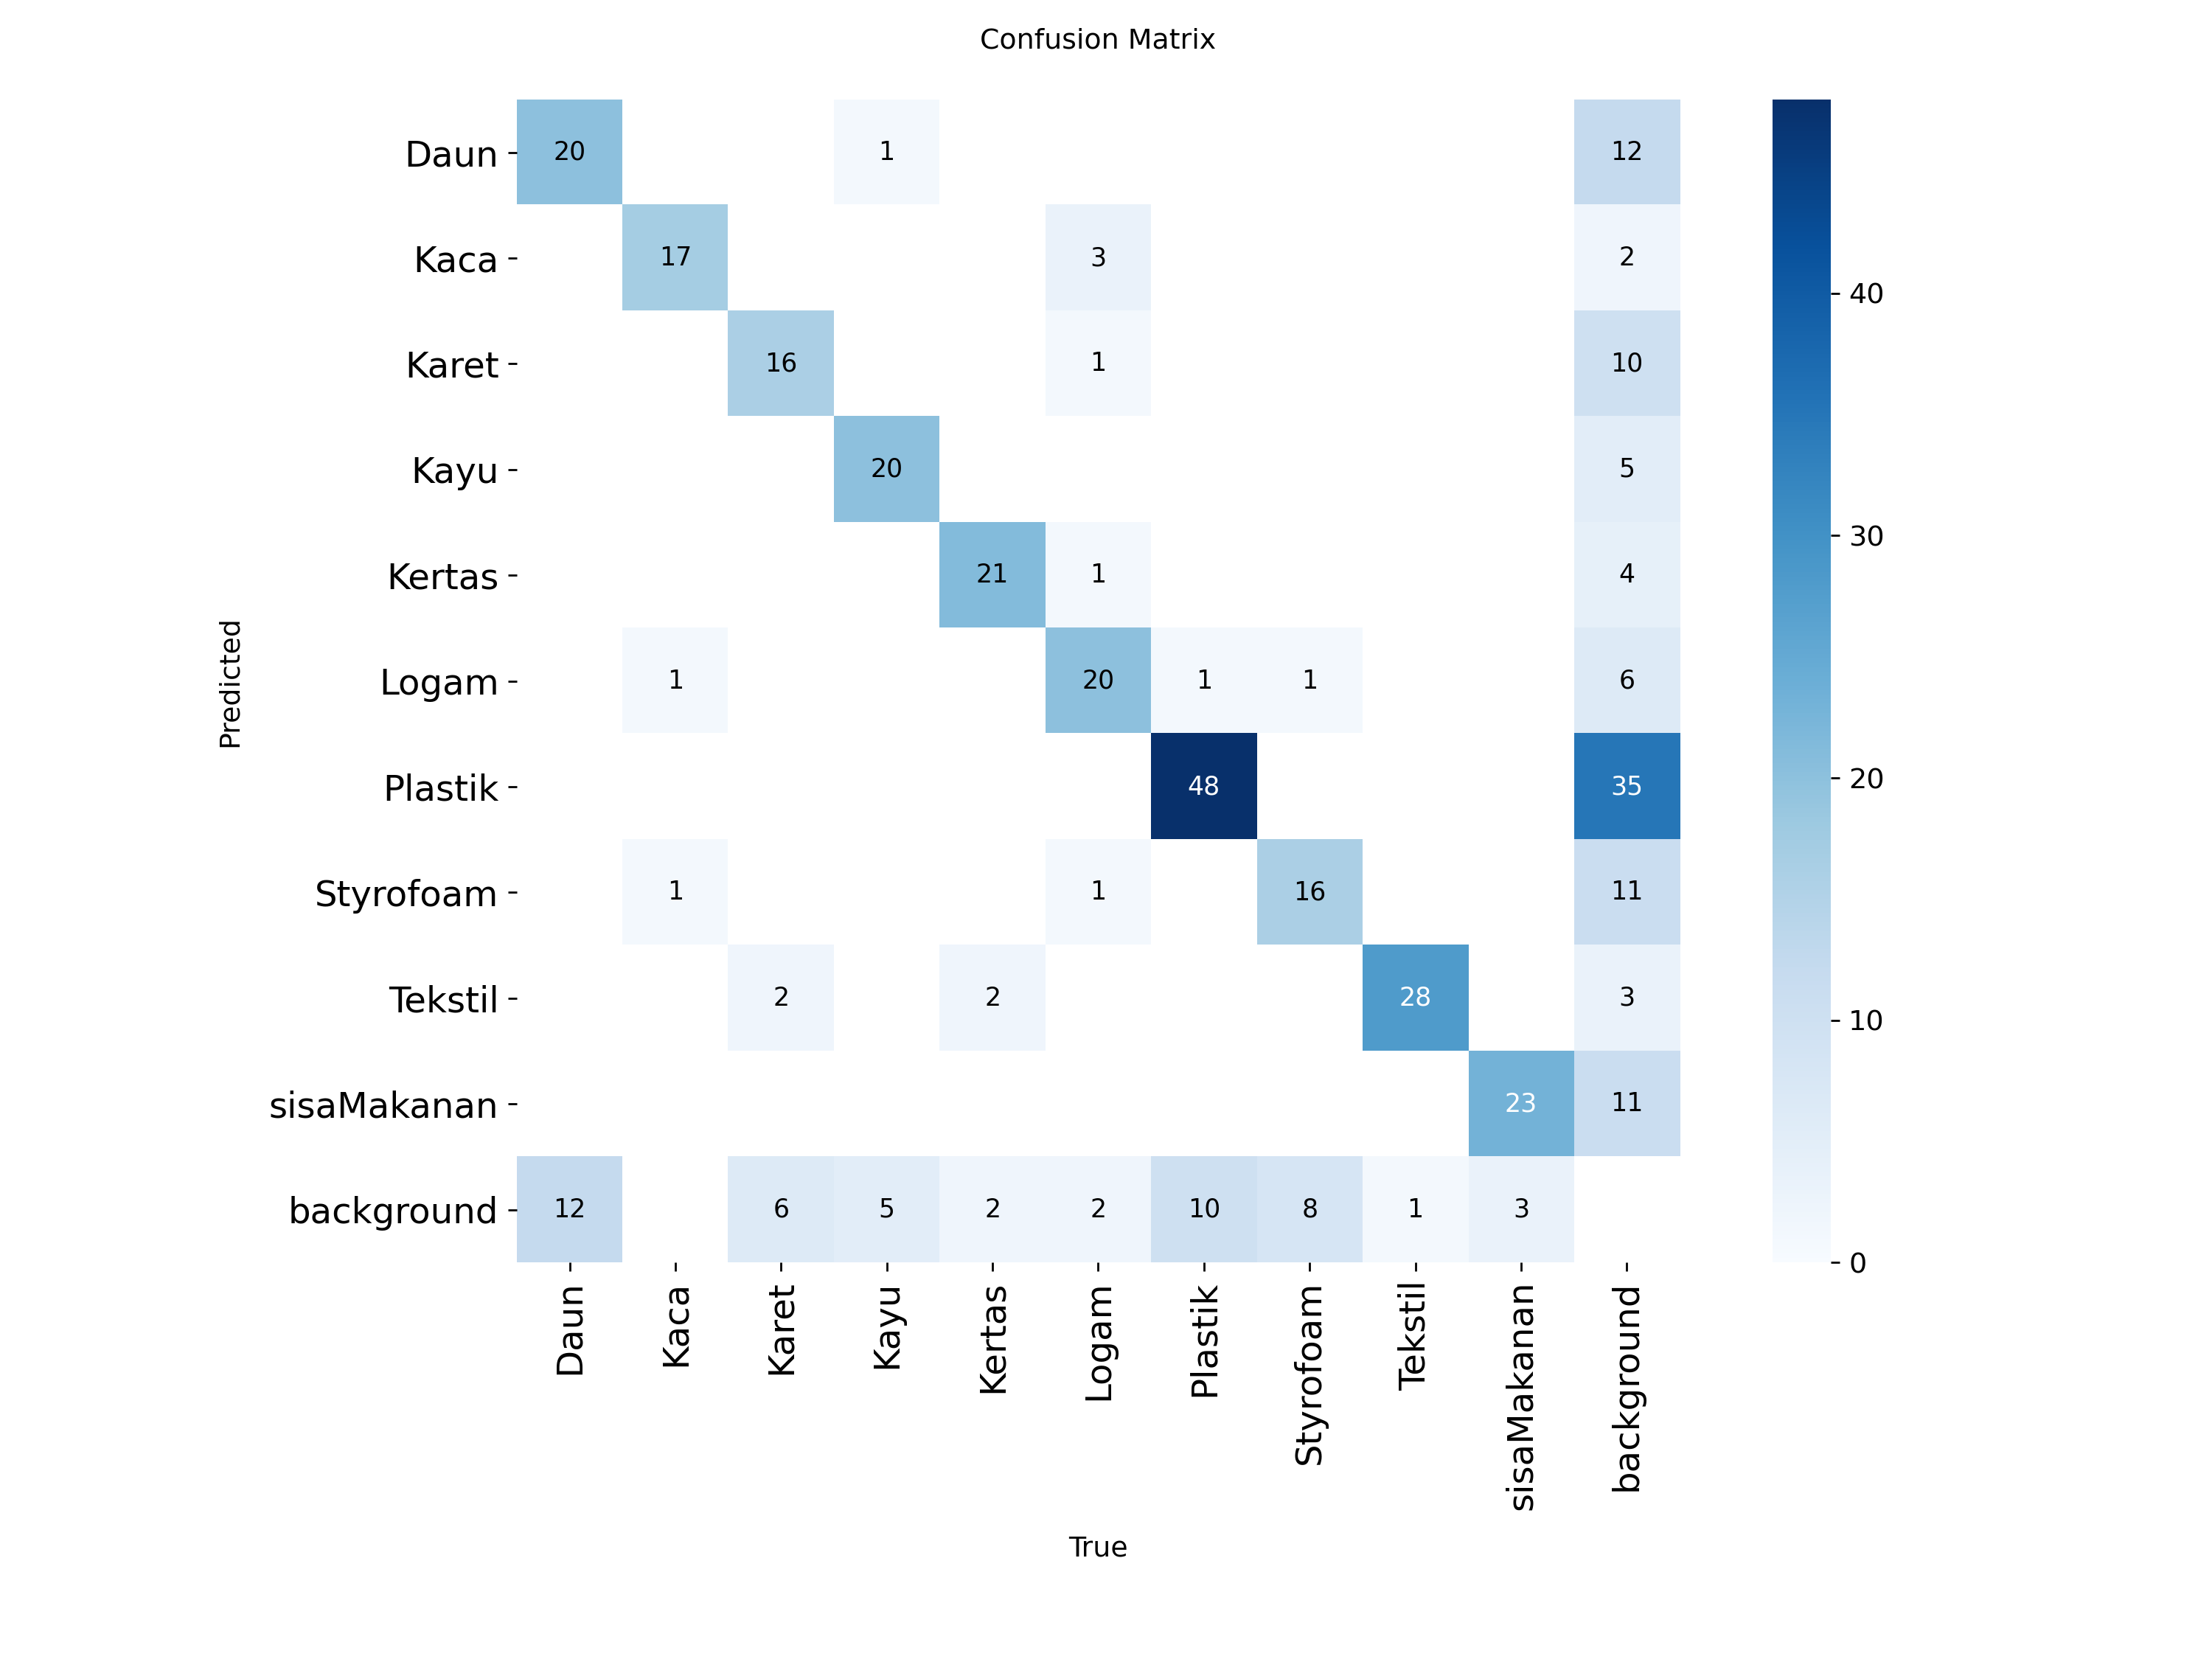

In [15]:
from IPython.display import display, Image
Image(filename=f'/content/runs/detect/custom-yolov82/confusion_matrix.png',width = 600)

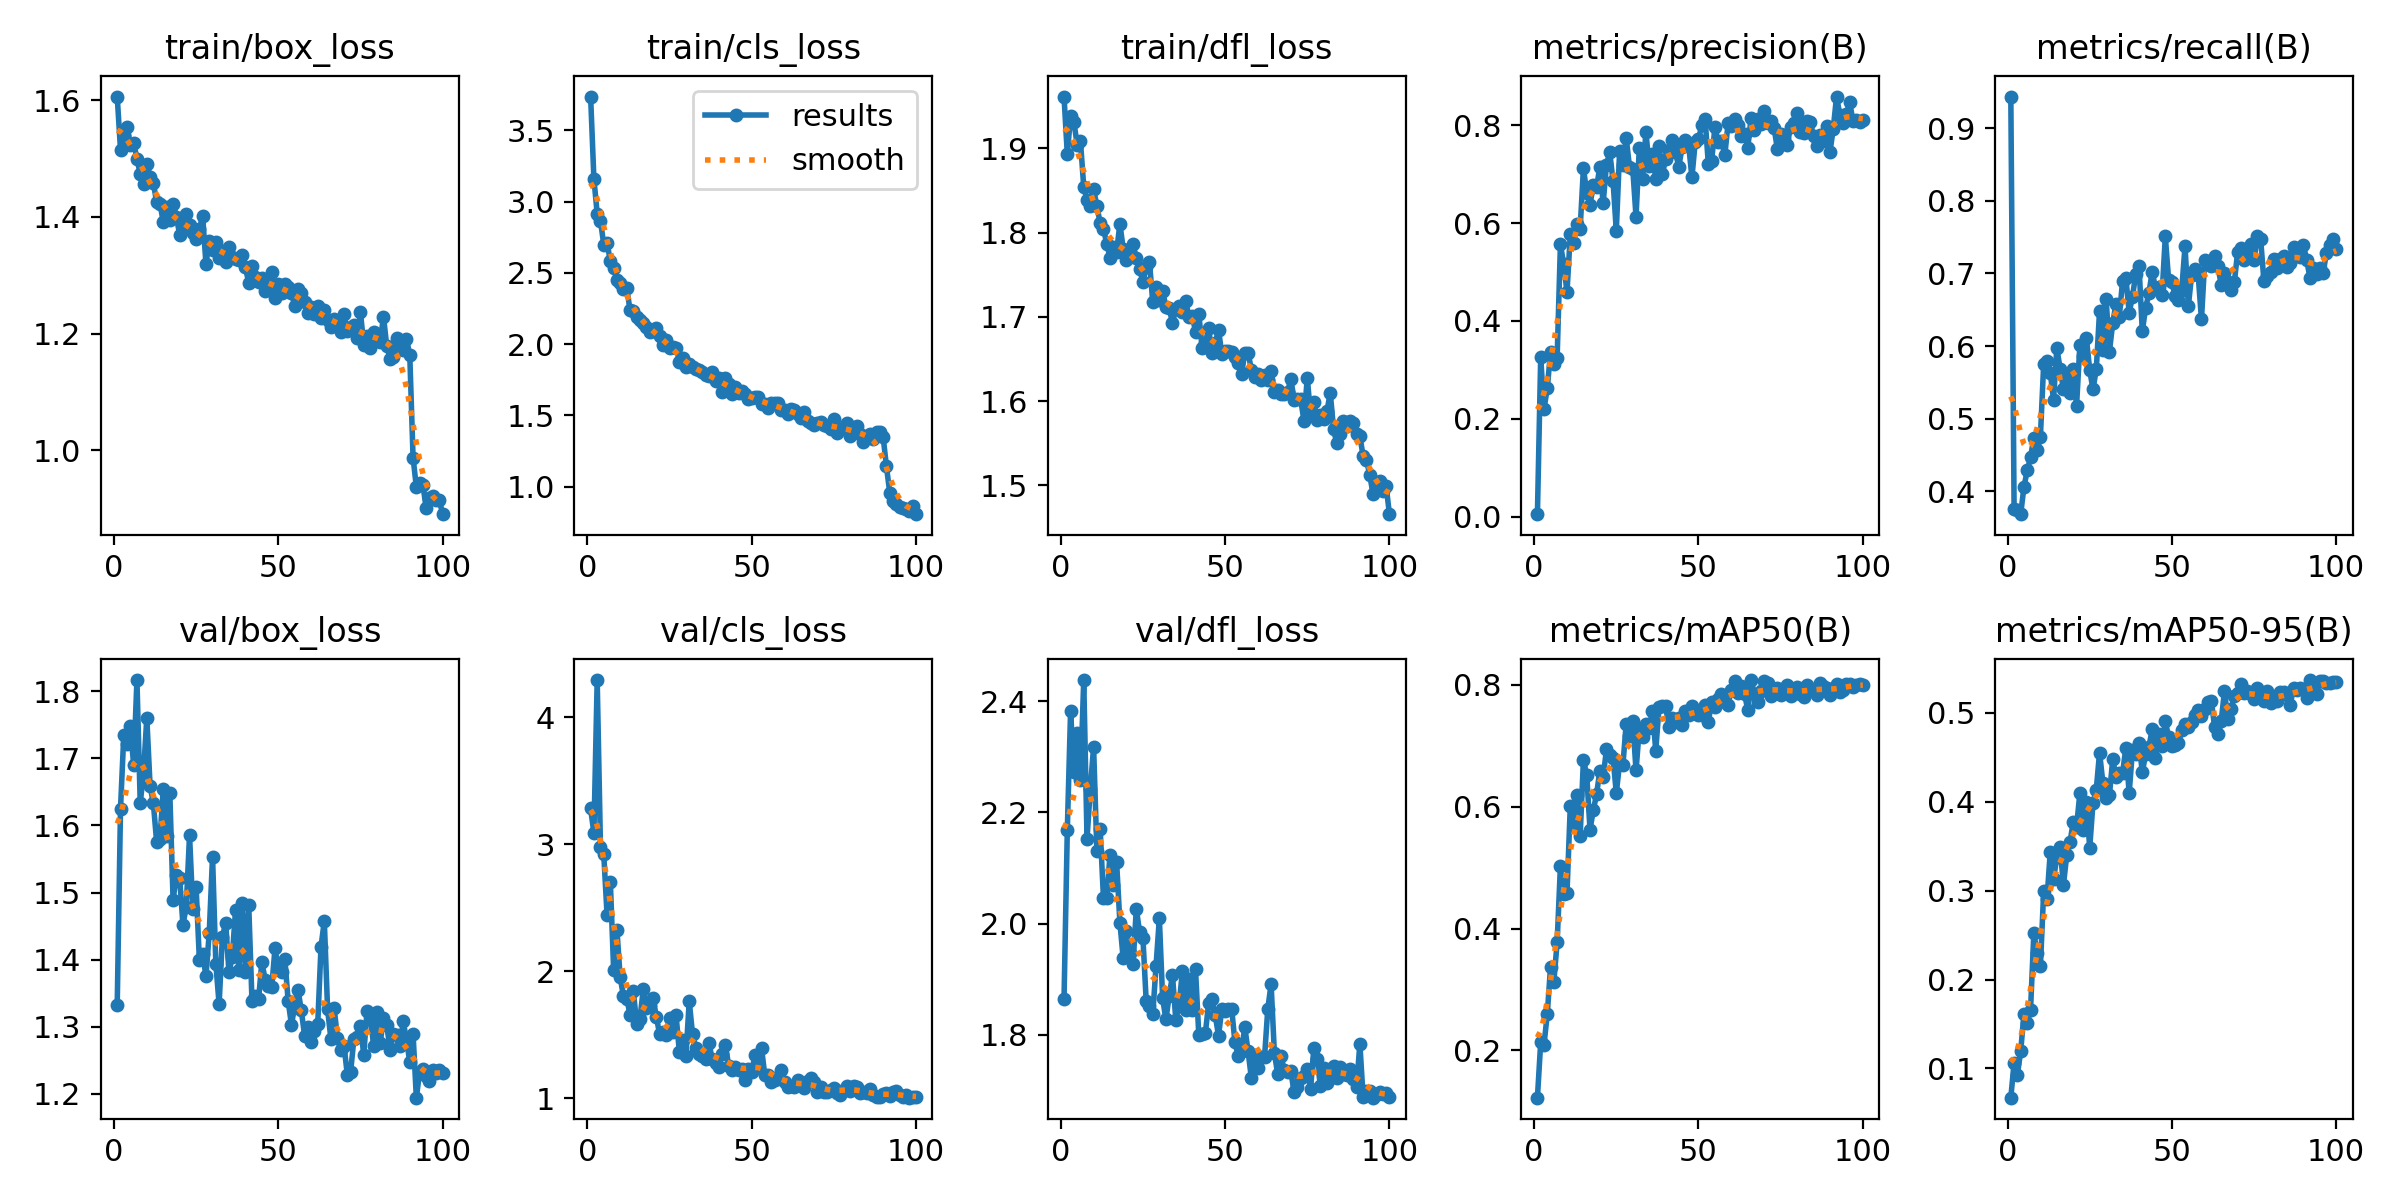

In [16]:
Image(filename=f'/content/runs/detect/custom-yolov82/results.png',width = 600)

In [21]:
from google.colab import files
files.download("runs/detect/custom-yolov82/weights/best.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
!zip -r custom-yolov8.zip runs/detect/custom-yolov82

  adding: runs/detect/custom-yolov82/ (stored 0%)
  adding: runs/detect/custom-yolov82/val_batch2_pred.jpg (deflated 4%)
  adding: runs/detect/custom-yolov82/val_batch2_labels.jpg (deflated 4%)
  adding: runs/detect/custom-yolov82/val_batch0_pred.jpg (deflated 5%)
  adding: runs/detect/custom-yolov82/args.yaml (deflated 52%)
  adding: runs/detect/custom-yolov82/val_batch1_labels.jpg (deflated 6%)
  adding: runs/detect/custom-yolov82/P_curve.png (deflated 6%)
  adding: runs/detect/custom-yolov82/train_batch2.jpg (deflated 3%)
  adding: runs/detect/custom-yolov82/confusion_matrix.png (deflated 21%)
  adding: runs/detect/custom-yolov82/PR_curve.png (deflated 10%)
  adding: runs/detect/custom-yolov82/results.csv (deflated 61%)
  adding: runs/detect/custom-yolov82/F1_curve.png (deflated 4%)
  adding: runs/detect/custom-yolov82/train_batch6031.jpg (deflated 5%)
  adding: runs/detect/custom-yolov82/val_batch0_labels.jpg (deflated 5%)
  adding: runs/detect/custom-yolov82/train_batch6032.jpg (d

In [19]:
!yolo detect predict model=runs/detect/custom-yolov82/weights/best.pt source=SapuJagat-2/valid/images save=True

Ultralytics 8.3.152 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,598 parameters, 0 gradients, 8.1 GFLOPs

image 1/228 /content/SapuJagat-2/valid/images/000000_jpg.rf.b3e4a16985fa73bafb82350870397fca.jpg: 640x640 1 Logam, 10.0ms
image 2/228 /content/SapuJagat-2/valid/images/000001_jpg.rf.6a317abe299ec7b8ac88d05636900e92.jpg: 640x640 3 Styrofoams, 7.3ms
image 3/228 /content/SapuJagat-2/valid/images/000003_jpg.rf.92733ad71bf4e2befc3f347c8722b54c.jpg: 640x640 1 Plastik, 7.2ms
image 4/228 /content/SapuJagat-2/valid/images/000014_jpg.rf.a929add90b964a3fad746d44e7385ece.jpg: 640x640 1 Tekstil, 7.2ms
image 5/228 /content/SapuJagat-2/valid/images/000015_jpg.rf.6d621b8df85deaa04ee9369756e8fd25.jpg: 640x640 1 Kayu, 2 Styrofoams, 7.2ms
image 6/228 /content/SapuJagat-2/valid/images/000035_jpg.rf.60e8747b5ec01764ffc6d82efa0e1991.jpg: 640x640 2 Styrofoams, 7.2ms
image 7/228 /content/SapuJagat-2/valid/images/000046_jpg.rf.240a64fb6e516bb97e4e46

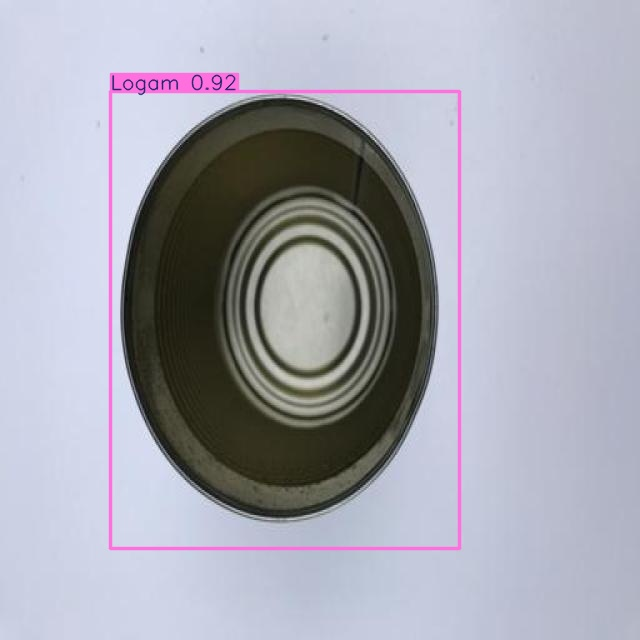

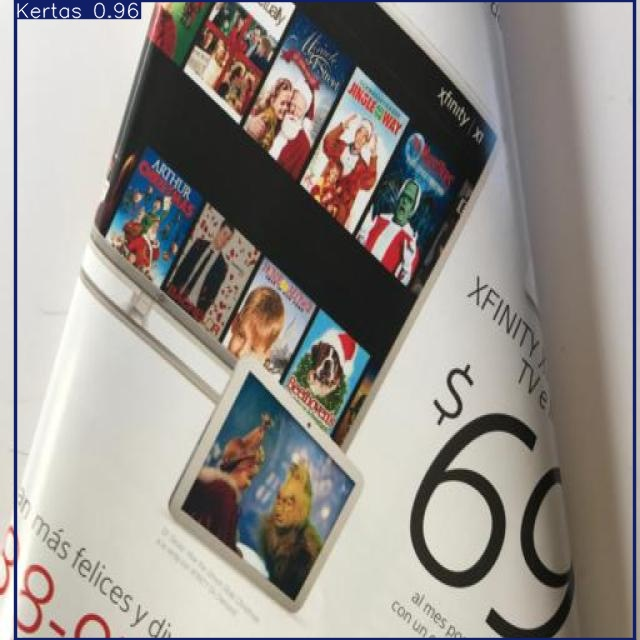

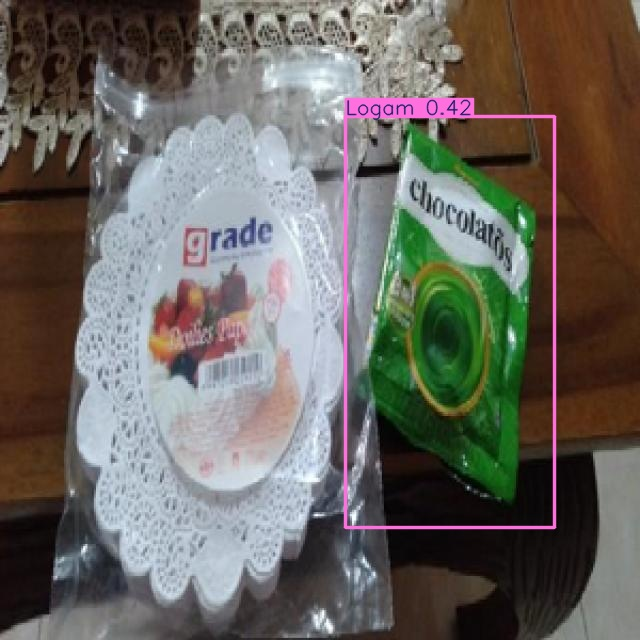

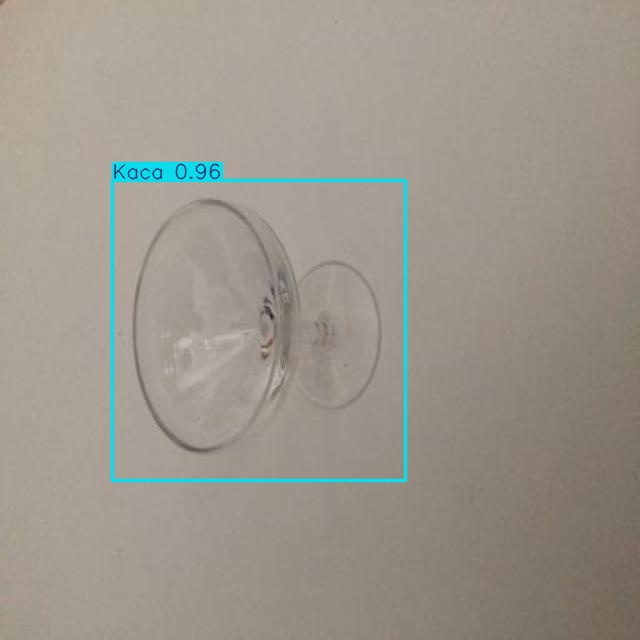

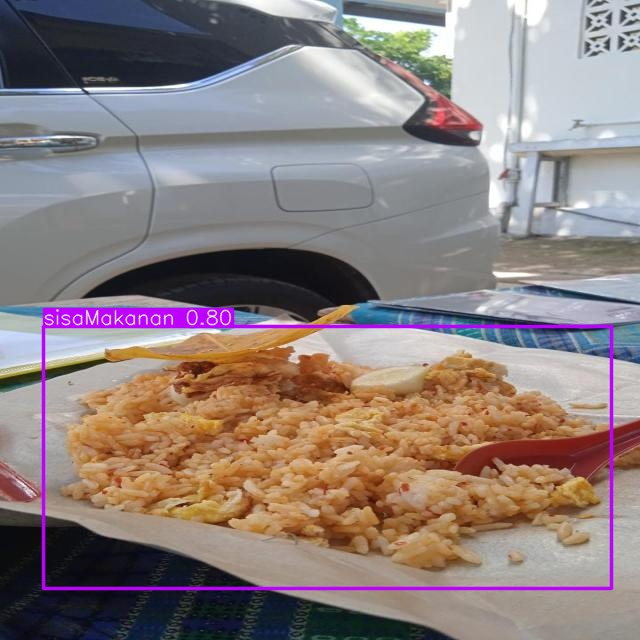

In [20]:
import glob
from IPython.display import Image, display

# Tampilkan beberapa gambar hasil prediksi
for img_path in glob.glob('runs/detect/predict/*.jpg')[:5]:
    display(Image(filename=img_path))